In [147]:
# Solutions

In [148]:
def load_data():
    
    acceptance = pd.read_csv("Acceptance.csv")
    chargeback = pd.read_csv("Chargeback.csv")
    data=pd.merge(acceptance,chargeback,how='left',on='external_ref')
    
    return data

In [149]:
print(data.shape)

(3801, 14)


In [150]:
data.head()

,external_ref,status_x,source_x,ref,date_time,state,cvv_provided,amount,country,currency,rates,status_y,source_y,chargeback
763,AjaqMZxRDh_11Meo0HuZh,True,GLOBALPAY,evt_1EMB-CIhbHPnNEAR2fO9X7a,2019-01-26T14:24:00.000Z,ACCEPTED,False,23342.449219,UK,GBP,"{""CAD"":1.3968069551380207,""EUR"":0.874326364256...",True,GLOBALPAY,False
116,MfPsikmH0XJj8acNt8pwR,True,GLOBALPAY,evt_1E354iIWRoKUdnl-lTrVzQk,2019-01-04T04:48:00.000Z,ACCEPTED,False,3880.379883,AE,USD,"{""CAD"":1.4056708158890983,""EUR"":0.907337694828...",True,GLOBALPAY,True
3434,DZT59ekxOn1vrqqYY14mV,True,GLOBALPAY,evt_1E0lbKSxvw-ewazgr3x_xHY,2019-04-25T19:12:00.000Z,ACCEPTED,False,101230.101562,UK,GBP,"{""CAD"":1.3788743953041551,""EUR"":0.774079084405...",True,GLOBALPAY,False
1731,oB6IT5vZY3M1r13lNSz6y,True,GLOBALPAY,evt_1EezN6HdSzqSY3tn0h8VFg1,2019-02-27T04:48:00.000Z,ACCEPTED,False,50536.281250,CA,CAD,"{""CAD"":1.4083546539083278,""EUR"":0.862347672547...",True,GLOBALPAY,False
5138,gEwNL3WLVOVnbMurSbHOe,True,GLOBALPAY,evt_1EowXV1R_mSZWb_dapwcp4G,2019-06-21T14:24:00.000Z,ACCEPTED,False,155511.078125,MX,MXN,"{""CAD"":1.3648004090302197,""EUR"":0.671634228876...",True,GLOBALPAY,False


In [151]:
All = data.shape[0]
accepted = data[data['state'] == 'ACCEPTED']
declined = data[data['state'] == 'DECLINED']

x = len(accepted)/All
y = len(declined)/All

print('ACCEPTED :',x*100,'%')
print('DECLINED :',y*100,'%')

ACCEPTED : 70.11312812417785 %
DECLINED : 29.886871875822152 %


Text(0, 0.5, 'Frequency')

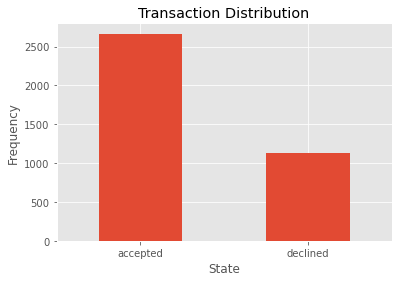

In [152]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

# Transaction class against the Frequency
labels = ['accepted','declined']
classes = pd.value_counts(data['state'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Distribution")
plt.xticks(range(2), labels)
plt.xlabel("State")
plt.ylabel("Frequency")

In [153]:
dec = declined.loc[declined ['currency'] == 'USD', 'amount']  #35.229.690
dec.sum()

35229690.0

In [154]:
dec = accepted.loc[accepted ['currency'] == 'USD', 'amount']  #76.251.710
dec.sum()

76251710.0

In [155]:
data['chargeback'].isnull().sum()

0

In [156]:
data['chargeback'].isnull().any()

False

In [157]:
print(data['country'].unique())

['UK' 'AE' 'CA' 'MX' 'US' 'FR']


In [158]:
dec_UK = declined.loc[declined ['country'] == 'UK', 'amount']  #13.833.425
dec_UK.sum()

13833425.0

In [159]:
dec_AE = declined.loc[declined ['country'] == 'AE', 'amount']  #17.796.960
dec_AE.sum()

17796960.0

In [160]:
dec_CA = declined.loc[declined ['country'] == 'CA', 'amount']  #17.106.668
dec_CA.sum()

17106668.0

In [161]:
dec_MX = declined.loc[declined ['country'] == 'MX', 'amount']  #15.788.996
dec_MX.sum()

15788996.0

In [162]:
dec_US = declined.loc[declined ['country'] == 'US', 'amount'] #17.432.724
dec_US.sum()

17432724.0

In [163]:
dec_FR = declined.loc[declined ['country'] == 'FR', 'amount']  #16.753.356
dec_FR.sum()

16753356.0

In [164]:
#There is no country where the amount of declined transactions went over $25M